# Coding Project - Watermark

Write code to automatically add a watermark to a photograph.

![ ](wm_proj.jpg)

## Main requirements

The minimum requirements are to:
* Add the white pixels from the watermark somewhere in the photograph.
* Save the resulting image as an image file & display it in the notebook

You may use the *watermark.png* file available in the GitHub repository, or choose/create your own.

## Additional requirements

(note: this is not an exhaustive list, use your imagination!)

* Add an option to choose the watermark location
* Add transparency effect to the watermark
* Determine if the watermark should be dark or light based on the luminosity of the image

------------------------------------------------------------------------------------------------------------------------------
# Approach

Since i didn't found the image mentionned in the instructions (wm_proj.jpg), i did it with the balloon image (view.jpg)

<img src="view.jpg" alt="view" width="300"/>

fot the watermark, i decided to use a custom one. 

here is my approach : 





/tmp/ipykernel_2645/297750319.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imread(photo_path)
/tmp/ipykernel_2645/297750319.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  template= imread(watermark_path)


(430, 750, 3)
(150, 150, 4)
(75, 75)
(430, 750, 3)
(5650, 5650, 4)
(84, 84)


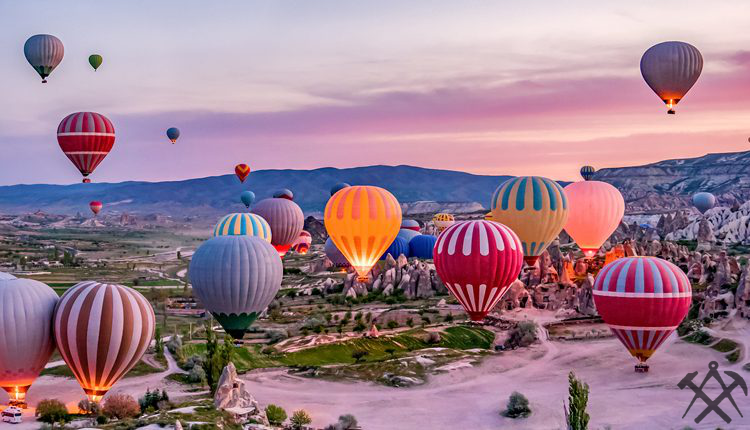

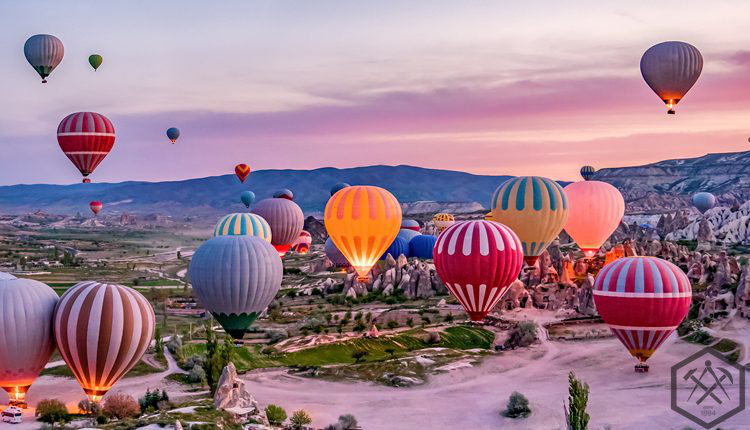

In [43]:
# -- Your code here -- #
from PIL import Image
from imageio import imread

def watermark_photo(photo_path: str, watermark_path: str, output_image_path: str = None, alpha=0.5, size_multiplier=0.5):
    
    base_image = Image.open(photo_path)
    watermark = Image.open(watermark_path).convert("RGBA") # Avoid P mode
    
    position = (750,430)
    image = imread(photo_path)
    print(image.shape)

    newsize = (int(watermark.size[0]*size_multiplier), int(watermark.size[1]*size_multiplier))
    watermark = watermark.resize(newsize)
    template= imread(watermark_path)
    print(template.shape)
    print(newsize)

    watermark_trans = Image.new("RGBA",watermark.size)
    #print(watermark.mode, watermark_trans.mode)
    watermark_trans = Image.blend(watermark_trans, watermark, alpha)
    base_image.paste(watermark_trans,(position[0]-watermark.size[0], position[1]-watermark.size[1]),watermark_trans)
    if output_image_path:
        base_image.save(output_image_path)
    return base_image

test1 = watermark_photo('view.jpg', 'Logo_of_CP.png', output_image_path="Custom_img_1.jpg", alpha=0.6)
test2 = watermark_photo('view.jpg', 'cropped-logoCP-2.png', output_image_path="Custom_img_1.jpg", alpha=0.6, size_multiplier=0.015)
display(test1)
display(test2)

# Conclusion 

I tried to apply with my custom watermark (since we had already the corrections for this project, i tought i would add some things myself)

There is still a little miscomprehension with the size of the .png images. there so much different i couldn't use the same function on both. 

That is why i added a argument to my function so i could change the resize multiplier as i want whith differents image. (here one png is size  $84$ x $84$ and the other is $5650$ x $5650$)